In [1]:
import numpy as np
import sys
import datetime
import h5py as h5
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append('../..')
from smalldata_tools.ana_funcs import make_waveform_basis
# import smalldata_tools.DetObject as dobj

In [2]:
plt.style.use('dark_background')
#matplotlib.rcParams.keys()
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('font', size=14)
length = 8
width = 1.5
plt.rcParams['xtick.major.size'] = length
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width

# Example on how to make the waveform basis for svd analysis

In [3]:
# exp_name = 'xcsx35017'
exp_name = 'xpplv7918'
run = 5
# det_name = 'GMD_ACQ_RAW'
det_name = 'acq_0'
nevt_max = 200
b = 50
n_c = 2
# roi = [1350,1800]
roi = None

hutch = exp_name[:3]
savePath = Path('/reg/d/psdm/{}/{}/calib'.format(hutch, exp_name))

dstr = 'exp={}:run={}'.format(exp_name, run)
print('\n'+dstr+'\n')


exp=xpplv7918:run=5



## Make basis

In [4]:
# reload(make_waveform_basis)
fbasis = make_waveform_basis.make_basis(exp_name, run, det_name, 
                                        nWaveforms=nevt_max, 
                                        bkg_idx=b, 
                                        n_c=n_c, 
                                        roi=roi, 
                                        channel=0)
# fbasis = make_waveform_basis.make_basis(exp_name, run, det_name, nWaveforms=nevt_max, bkg_idx=b, n_c=n_c, roi=roi)


exp=xpplv7918:run=5

Getting the detector for:  acq_0
wave_basis_acq_0_20210317_185356.h5
Basis file saved as /reg/d/psdm/xpp/xpplv7918/hdf5/basis/wave_basis_acq_0_20210317_185356.h5.


In [5]:
print(fbasis)

/reg/d/psdm/xpp/xpplv7918/hdf5/basis/wave_basis_acq_0_20210317_185356.h5


## Check basis file

In [6]:
f = h5.File(fbasis, 'r')
print('\n'.join(f.keys()))

background_index
channel
components
projector
ref_waveforms
roi
singular_values


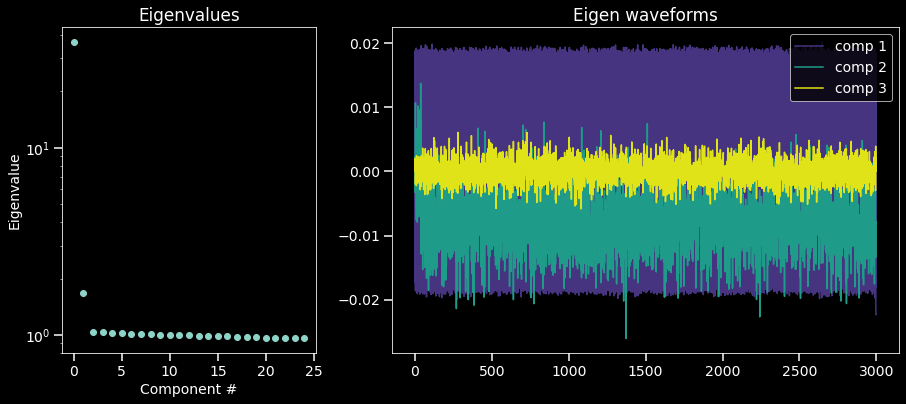

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,6), gridspec_kw={'width_ratios':[1,2]})

ax[0].set_title('Eigenvalues')
ax[0].plot(f['singular_values'][()],'o')
ax[0].set_yscale('log')
ax[0].set_xlabel('Component #')
ax[0].set_ylabel('Eigenvalue')
ax[1].set_title('Eigen waveforms')

colors = plt.cm.viridis(np.linspace(0.15,0.95,3))
ax[1].plot(f['components'][0], color=colors[0], label='comp 1')
ax[1].plot(0.5*f['components'][1], color=colors[1], label='comp 2')
ax[1].plot(0.1*f['components'][2], color=colors[2], label='comp 3')
ax[1].legend()
plt.show()

The eigenvalues give a good indication of how many components should be taken for the fit of the waveforms. Eigenvalues up to ~saturation should be taken. This generally happens afer 2-3 components.